In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

In [67]:
m_map={
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

In [68]:
df=pd.read_csv('winequality-white.csv')
df['Overall Acidity']=df['fixed acidity']+df['volatile acidity']
df['Average Acidity']=(df['fixed acidity']+df['volatile acidity'])/2
df['sulfur dioxide content']=df['free sulfur dioxide']+df['total sulfur dioxide']
df['Average sulfur dioxide content']=(df['free sulfur dioxide']+df['total sulfur dioxide'])/2
df=df.dropna(how='any')
df['quality check']=df['quality'].map(m_map)
df['quality check'] = df['quality check'].fillna(0)
df['quality check']=df['quality check'].astype(int)
df=df.drop(columns=['fixed acidity','volatile acidity','free sulfur dioxide','total sulfur dioxide','quality'])
display(df)


,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,Overall Acidity,Average Acidity,sulfur dioxide content,Average sulfur dioxide content,quality check
0,0.36,20.7,0.045,1.00100,3.00,0.45,8.8,7.27,3.635,215.0,107.5,3
1,0.34,1.6,0.049,0.99400,3.30,0.49,9.5,6.60,3.300,146.0,73.0,3
2,0.40,6.9,0.050,0.99510,3.26,0.44,10.1,8.38,4.190,127.0,63.5,3
3,0.32,8.5,0.058,0.99560,3.19,0.40,9.9,7.43,3.715,233.0,116.5,3
4,0.32,8.5,0.058,0.99560,3.19,0.40,9.9,7.43,3.715,233.0,116.5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.29,1.6,0.039,0.99114,3.27,0.50,11.2,6.41,3.205,116.0,58.0,3
4894,0.36,8.0,0.047,0.99490,3.15,0.46,9.6,6.92,3.460,225.0,112.5,2
4895,0.19,1.2,0.041,0.99254,2.99,0.46,9.4,6.74,3.370,141.0,70.5,3
4896,0.30,1.1,0.022,0.98869,3.34,0.38,12.8,5.79,2.895,130.0,65.0,4


In [69]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values


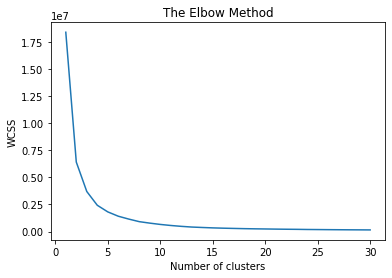

In [70]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,31):
   k_means=KMeans(n_clusters=i,init='k-means++',random_state=0)
   k_means.fit(X)
   wcss.append(k_means.inertia_)
plt.plot(range(1, 31), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [79]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

In [80]:
y_pred

array([5, 1, 2, ..., 2, 2, 2], dtype=int32)

Clustering Accuracy Score

In [83]:
from sklearn import metrics
metrics.adjusted_rand_score(Y,y_pred)

0.009438027883311446

In [84]:
metrics.adjusted_mutual_info_score(Y,y_pred)  

0.02241201229399986

Classification accuracy score

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y, y_pred)
print(cm)
accuracy_score(Y, y_pred)*100

[[  5   3   7   4   4   2]
 [  5  19  42  20  49  28]
 [125 298 226 319 131 358]
 [109 546 547 328 201 467]
 [ 12 274 276  59  81 178]
 [ 10  53  47   7  17  41]]


14.291547570436913